In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [156]:
df = pd.read_csv("Account_Statement CBI.csv")

In [188]:
df

,Post Date,Value Date,Branch Code,Cheque Number,Account Description,Debit,Credit,Balance
0,01-01-2024,01-01-2024,3295,,CREDIT/001030001030001030001030,NaN,84056.0,230104.08
1,02-01-2024,02-01-2024,3295,,CASH WITHDRAWAL/SELF,100000.0,NaN,130104.08
2,03-01-2024,03-01-2024,4982,,TO TRANSFER/UPI/RRN 400320704152/UPI,620.0,NaN,129484.08
3,04-01-2024,04-01-2024,4982,,TO TRANSFER/UPI/RRN 400475938685/UPI,345.0,NaN,129139.08
4,07-01-2024,07-01-2024,3295,,WITHDRAWAL TRANSFER,5000.0,NaN,124139.08
...,...,...,...,...,...,...,...,...
284,13-06-2025,13-06-2025,4982,,TO TRANSFER/UPI/RRN 516417532969/UPI,2759.0,NaN,191604.79
285,19-06-2025,19-06-2025,4982,,TO TRANSFER/UPI/RRN 100143646405/Upi Transaction,50.0,NaN,191554.79
286,20-06-2025,20-06-2025,4982,,TO TRANSFER/UPI/RRN 517124381376/UPI,249.0,NaN,191305.79
287,22-06-2025,22-06-2025,4982,,TO TRANSFER/UPI/RRN 553988396831/UPI,10000.0,NaN,181305.79


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 286 entries, 0 to 288
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Post Date            286 non-null    object
 1   Value Date           286 non-null    object
 2   Branch Code          286 non-null    object
 3   Cheque Number        286 non-null    object
 4   Account Description  286 non-null    object
 5   Debit                286 non-null    object
 6   Credit               286 non-null    object
 7   Balance              286 non-null    object
dtypes: object(8)
memory usage: 28.2+ KB


In [144]:
(df['Debit'].isna()) & (df['Credit'].isna())

0      False
1      False
2      False
3      False
4      False
       ...  
284    False
285    False
286    False
287    False
288    False
Length: 289, dtype: bool

In [160]:
df = df[~(df['Debit'].str.contains(' ') & df['Credit'].str.contains(' '))].copy()

In [184]:
df['Balance'] = df['Balance'].str.strip(' CR')
df.head()

,Post Date,Value Date,Branch Code,Cheque Number,Account Description,Debit,Credit,Balance
0,01-01-2024,01-01-2024,3295,,CREDIT/001030001030001030001030,,84056,230104.08
1,02-01-2024,02-01-2024,3295,,CASH WITHDRAWAL/SELF,100000,,130104.08
2,03-01-2024,03-01-2024,4982,,TO TRANSFER/UPI/RRN 400320704152/UPI,620,,129484.08
3,04-01-2024,04-01-2024,4982,,TO TRANSFER/UPI/RRN 400475938685/UPI,345,,129139.08
4,07-01-2024,07-01-2024,3295,,WITHDRAWAL TRANSFER,5000,,124139.08


In [186]:
df[['Debit','Credit','Balance']] = df[['Debit','Credit','Balance']].apply(pd.to_numeric, errors = 'coerce')

In [190]:
df[['Post Date', 'Value Date']] = df[['Post Date', 'Value Date']].apply(pd.to_datetime, format = '%d-%m-%Y')

In [220]:
df.head()

,Post Date,Value Date,Branch Code,Cheque Number,Account Description,Debit,Credit,Balance
0,2024-01-01,2024-01-01,3295,,CREDIT/001030001030001030001030,NaN,84056.0,230104.08
1,2024-01-02,2024-01-02,3295,,CASH WITHDRAWAL/SELF,100000.0,NaN,130104.08
2,2024-01-03,2024-01-03,4982,,TO TRANSFER/UPI/RRN 400320704152/UPI,620.0,NaN,129484.08
3,2024-01-04,2024-01-04,4982,,TO TRANSFER/UPI/RRN 400475938685/UPI,345.0,NaN,129139.08
4,2024-01-07,2024-01-07,3295,,WITHDRAWAL TRANSFER,5000.0,NaN,124139.08


In [194]:
total_Debited_Amount = df['Debit'].sum()
total_Debited_Amount

5225279.29

In [196]:
total_Credited_Amount = df['Credit'].sum()
total_Credited_Amount

5266398.0

In [198]:
debit_credit = ['Debit','Credit']
total_amount = [total_Debited_Amount, total_Credited_Amount]

In [200]:
def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],ha = 'center')

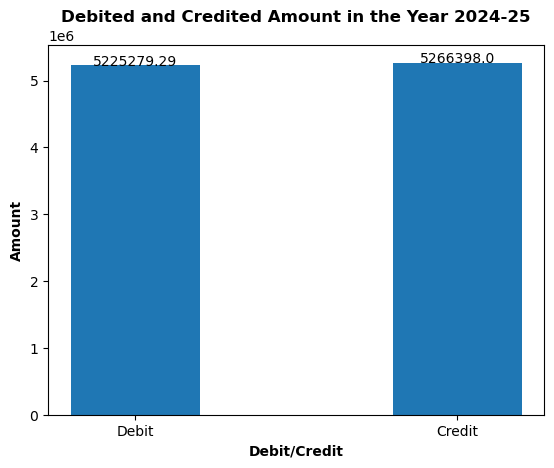

In [202]:
plt.bar(debit_credit, total_amount, width = 0.4)
add_labels(debit_credit, total_amount)

plt.title('Debited and Credited Amount in the Year 2024-25', fontweight = 'bold')
plt.xlabel('Debit/Credit', fontweight = 'bold')
plt.ylabel('Amount', fontweight = 'bold')

plt.savefig('Debited and Credited Amount in 2024-25.png', dpi = 300)

In [328]:
total_Debit_NEFT = df[(df['Account Description'].str.contains('NEFT')) & (~df['Debit'].isna())]['Debit'].sum()
print(len(df[(df['Account Description'].str.contains('NEFT')) & (~df['Debit'].isna())]))
print(total_Debit_NEFT)

7
745000.0


In [330]:
total_Debit_WITHDRAWAL = df[(df['Account Description'].str.contains('WITHDRAWAL')) & (~df['Debit'].isna())]['Debit'].sum()
print(len(df[(df['Account Description'].str.contains('WITHDRAWAL')) & (~df['Debit'].isna())]))
print(total_Debit_WITHDRAWAL)

16
595000.0


In [332]:
total_Debit_UPI = df[(df['Account Description'].str.contains('UPI')) & (~df['Debit'].isna())]['Debit'].sum()
print(len(df[(df['Account Description'].str.contains('UPI')) & (~df['Debit'].isna())]))
print(total_Debit_UPI)

209
778450.0


In [334]:
total_Debit_SMS = df[(df['Account Description'].str.contains('SMS CHARGES')) & (~df['Debit'].isna())]['Debit'].sum()
print(len(df[(df['Account Description'].str.contains('SMS CHARGES')) & (~df['Debit'].isna())]))
print(total_Debit_SMS)

2
32.29


In [336]:
total_Debit_Others = df[(~df['Debit'].isna()) & (~df['Account Description'].str.contains('UPI|SMS CHARGES|NEFT|WITHDRAWAL'))]['Debit'].sum()
print(len(df[(~df['Debit'].isna()) & (~df['Account Description'].str.contains('UPI|SMS CHARGES|NEFT|WITHDRAWAL'))]))
print(total_Debit_Others)

7
3106797.0


In [288]:
df[(~df['Debit'].isna()) & (~df['Account Description'].str.contains('UPI|SMS CHARGES|NEFT|WITHDRAWAL'))]

,Post Date,Value Date,Branch Code,Cheque Number,Account Description,Debit,Credit,Balance
80,2024-05-27,2024-05-27,621,,TO TRANSFER/PMSBY_NIACBIN7643027147 FY2024-25(...,20.0,NaN,357005.19
100,2024-06-21,2024-06-21,2684,,TO TRANSFER,200000.0,NaN,586938.29
126,2024-07-22,2024-07-22,3295,,TO TRANSFER/TR,1400000.0,NaN,1680476.39
127,2024-07-22,2024-07-22,3295,,TO TRANSFER/TRF TO MMDC A C,1500000.0,NaN,180476.39
175,2024-09-30,2024-09-30,4982,,TO TRANSFER,1045.0,NaN,105287.69
249,2025-03-09,2025-03-09,8103,,TO TRANSFER/492046851/PAYU/NA,5712.0,NaN,128573.31
271,2025-05-28,2025-05-28,621,,TO TRANSFER/PMSBY_JNS-PMSBY-23-24-01137156574-...,20.0,NaN,116006.51


In [320]:
debit_categories = [total_Debit_NEFT, total_Debit_WITHDRAWAL, total_Debit_UPI, total_Debit_SMS, total_Debit_Others]
labels = ['NEFT', 'CASH WITHDRAWAL', 'UPI', 'SMS CHARGES', 'OTHERS']
my_explode = [0,0,0,0,0]

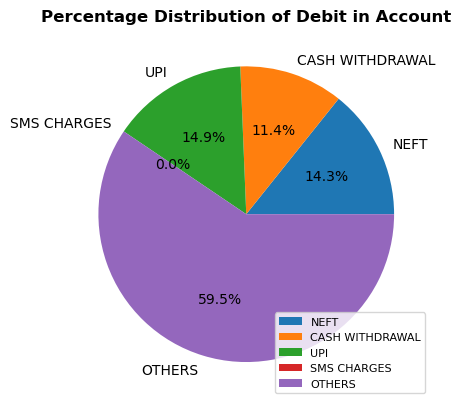

In [354]:
plt.pie(debit_categories, labels = labels, autopct = '%1.1f%%', explode = my_explode)
plt.title('Percentage Distribution of Debit in Account', fontweight = 'bold')
plt.legend(loc = 'lower right', prop = {'size':8})

plt.savefig('Percentage Distribution Of Debit in Account.png', dpi = 300)

In [380]:
# Transactions of Credit:
df[~df['Credit'].isna()]
print(len(df[~df['Credit'].isna()]))

45


In [376]:
total_Credit_SALARY = df[(~df['Credit'].isna()) & (df['Account Description'].str.contains('CREDIT'))]['Credit'].sum()
print(total_Credit_SALARY)
print(len(df[(~df['Credit'].isna()) & (df['Account Description'].str.contains('CREDIT'))]))

433756.0
13


In [378]:
total_Credit_UPI = df[(~df['Credit'].isna()) & (df['Account Description'].str.contains('UPI'))]['Credit'].sum()
print(total_Credit_UPI)
print(len(df[(~df['Credit'].isna()) & (df['Account Description'].str.contains('UPI'))]))

79694.0
13


In [384]:
total_Credit_NEFT = df[(~df['Credit'].isna()) & (df['Account Description'].str.contains('NEFT'))]['Credit'].sum()
print(total_Credit_NEFT)
print(len(df[(~df['Credit'].isna()) & (df['Account Description'].str.contains('NEFT'))]))

4193751.0
14


In [396]:
total_Credit_OTHERS = df[(~df['Credit'].isna()) & (df['Account Description'].str.contains('SALARY|CLO', case=False))]['Credit'].sum()
print(total_Credit_OTHERS)
print(len(df[(~df['Credit'].isna()) & (df['Account Description'].str.contains('SALARY|CLO', case=False))]))

556697.0
4


In [398]:
credit_categories = [total_Credit_SALARY, total_Credit_UPI, total_Credit_NEFT, total_Credit_OTHERS]
labels = ['SALARY','UPI','NEFT','OTHERS']

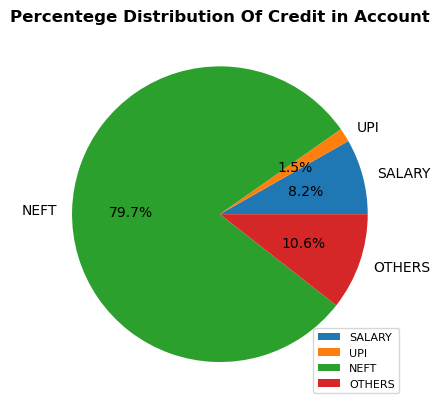

In [406]:
plt.pie(credit_categories, labels = labels, autopct = '%1.1f%%')
plt.title('Percentege Distribution Of Credit in Account', fontweight = 'bold')
plt.legend(loc = 'lower right', prop = {'size':8})

plt.savefig('Percentage Distribution Of Credit in Account.png', dpi = 300)

In [509]:
monthly_debits = df.groupby(df['Post Date'].dt.to_period('M'))['Debit'].sum()
monthly_debits = [round(val,2) for val in monthly_debits.tolist()]
monthly_debits

[147939.83,
 99300.0,
 93375.0,
 103807.06,
 197270.0,
 920894.8,
 3023134.0,
 54387.9,
 169979.8,
 84281.6,
 16399.0,
 9329.0,
 64552.9,
 35852.88,
 98053.9,
 18224.0,
 12416.72,
 76080.9]

In [511]:
months = list(df['Post Date'].dt.to_period('M').unique())
months = [str(m) for m in months]
months

['2024-01',
 '2024-02',
 '2024-03',
 '2024-04',
 '2024-05',
 '2024-06',
 '2024-07',
 '2024-08',
 '2024-09',
 '2024-10',
 '2024-11',
 '2024-12',
 '2025-01',
 '2025-02',
 '2025-03',
 '2025-04',
 '2025-05',
 '2025-06']

In [513]:
def add_horizontal_labels(x, y):
    for i in range(len(x)):
        plt.text(x[i] + 1000,i,x[i], va = 'center')

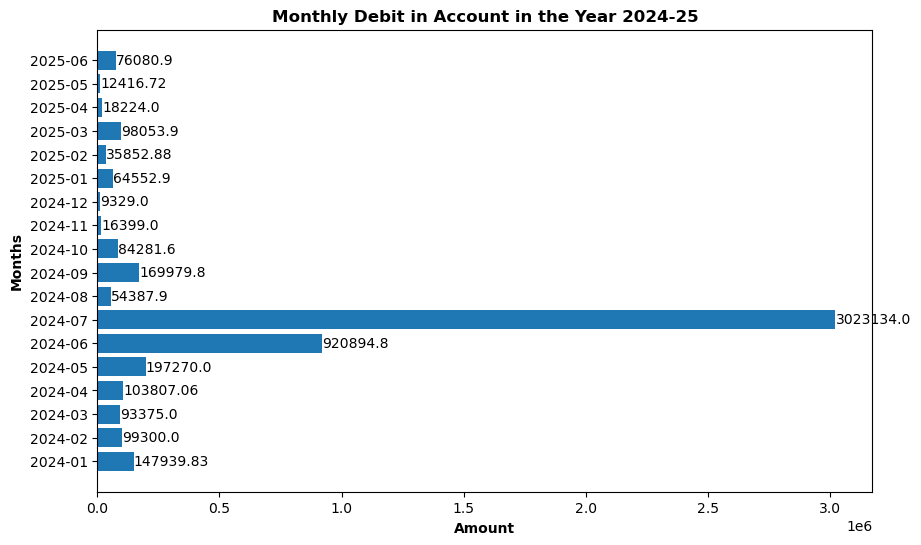

In [521]:
plt.figure(figsize = (10,6))
plt.barh(months, monthly_debits)

add_horizontal_labels(monthly_debits, months)

plt.title('Monthly Debit in Account in the Year 2024-25', fontweight = 'bold')
plt.xlabel('Amount', fontweight = 'bold')
plt.ylabel('Months', fontweight = 'bold')

plt.savefig('Monthly Debits in the Year 2024-25.png', dpi = 300)

In [ ]:
monthly_debits = df.groupby(df['Post Date'].dt.to_period('M'))['Debit'].sum()
monthly_debits = [round(val,2) for val in monthly_debits.tolist()]
monthly_debits